## Observations and Insights 

In [2]:
# Oberservation 
# 1: The is a possible correlation between mouse weight and tumor volume.
#2: Infubinol had the highest final tumor volume between the four most potential drugs.
#3: all the possible outliers were below 20 and above 51

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results,mouse_metadata, on = "Mouse ID")

# Display the data table for preview
mouse_study_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [18]:
# Checking the number of mice.
full_mouse_count = mouse_study_df["Mouse ID"]

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID = mouse_study_df.loc[:,["Mouse ID", "Timepoint"]]
mouse_group = mouse_ID.groupby(["Mouse ID"])
mouse_count = mouse_group.count()
mouse_count.head()

Timepoint
Mouse ID           
a203             10
a251             10
a262             10
a275             10
a366              7

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mouse_id = mouse_study_df.groupby(["Mouse ID"])
all_ID_count = all_mouse_id.count()
all_ID_count.head()

Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID                                                                       
a203             10                  10                10            10   10   
a251             10                  10                10            10   10   
a262             10                  10                10            10   10   
a275             10                  10                10            10   10   
a366              7                   7                 7             7    7   

          Age_months  Weight (g)  
Mouse ID                          
a203              10          10  
a251              10          10  
a262              10          10  
a275              10          10  
a366               7           7

In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_df.drop_duplicates(subset=["Mouse ID"], keep="last")

In [22]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_data["Mouse ID"]
clean_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
18       g107         35           71.905117                 0     Ketapril   
21       a457         10           49.783419                 0     Ketapril   
30       c819         40           62.175705                 1     Ketapril   
...       ...        ...                 ...               ...          ...   
1857     t565         45           34.455298                 0    Capomulin   
1867     i557         45           47.685963                 1    Capomulin   
1877     m957         45           33.329098                 1    Capomulin   
1882     f966         20           30.485985                 0    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
9     Female           9          22  
10      Male          15          29  
18    Female           2          29  
21    Female          11          30  
30      Male          21          25  
...      ...         ...         ...  
1857  Female          20          17  
1867  Female           1          24  
1877  Female           3          19  
1882    Male          16          17  
1892    Male          22          17  

[249 rows x 8 columns]

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = mouse_study_df.loc[:,["Drug Regimen", "Tumor Volume (mm3)"]]
drug_index = drug_tumor_df.set_index("Drug Regimen")

drug_mean = drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_name = drug_mean.rename("Mean Tumor Volume")

drug_median = drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_name = drug_median.rename("Median Tumor Volume")

drug_Var = drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Var_name = drug_Var.rename("Tumor Volume Variance")

drug_std = drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
STD_name = drug_std.rename("Tumor Volume Std. Dev")

drug_sem = drug_index.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Error_name = drug_sem.rename("Tumor Volume Std. Err.")

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_stats = pd.concat([mean_name, median_name, Var_name ,STD_name,Error_name], axis = 1)
drug_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor Volume Std. Err.  
Drug Regimen                                                 
Capomulin                  4.994774                0.329346  
Ceftamin                   6.268188                0.469821  
Infubinol                  6.567243                0.492236  
Ketapril                   8.279709                0.603860  
Naftisol                   8.134708                0.596466  
Placebo                    7.821003                0.581331  
Propriva                   6.507770                0.512884  
Ramicane                   4.846308                0.320955  
Stelasyn                   7.710419                0.573111  
Zoniferol                  6.966589                0.516398

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats2 = drug_tumor_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# This method produces everything in a single groupby function
drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

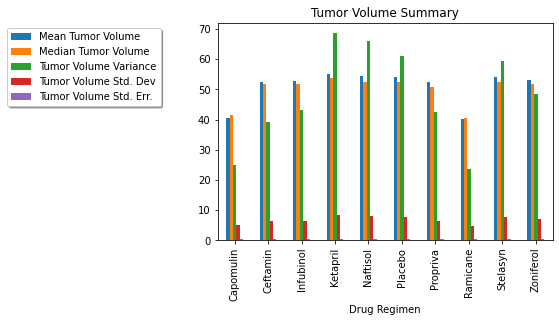

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_bar = drug_stats.plot(kind = "bar", title= "Tumor Volume Summary")
drug_bar.legend(loc = 'upper center', bbox_to_anchor=(-.4, 1),shadow=True, ncol=1)

Text(0, 0.5, 'Total number of mice for each treatment')

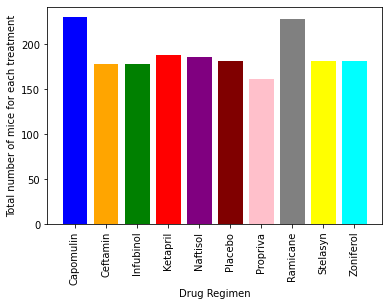

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
groupdrug = drug_index.groupby("Drug Regimen")
group_count = groupdrug.count()
index_list = group_count.index.tolist()
column_list = group_count["Tumor Volume (mm3)"].tolist()
plt.bar(index_list, column_list, color= ("blue","orange","green","red","purple", 
        "maroon", "pink", "grey", "yellow", "cyan"))
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice for each treatment")

Text(0, 0.5, 'Total number of mice for each treatment')

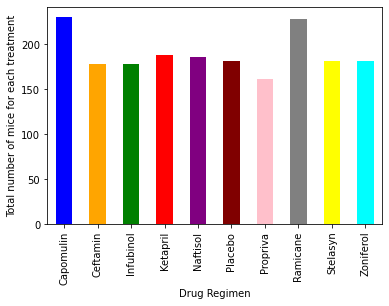

In [27]:
bar = group_count.plot(kind = "bar", legend = None , color = [('Blue','orange','green','red', 
                                               'purple', 'maroon', 'pink', 'grey', 'yellow', 'cyan')])
plt.ylabel("Total number of mice for each treatment")

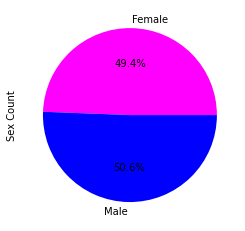

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = mouse_study_df.loc[:,["Sex", "Mouse ID"]]
sex_group = sex.groupby("Sex")
sex_count = sex_group.count()
sex_count = sex_count.rename(columns ={"Mouse ID": "Sex Count"})
colors = ["magenta","blue"]
sex_count.plot(kind='pie', y = 'Sex Count', colors= colors ,autopct='%1.1f%%',legend = False)
plt.show()

<ipython-input-29-5e28ed1cbbad>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(counts.values, labels=counts.index.values ,colors = colors ,autopct='%1.1f%%')


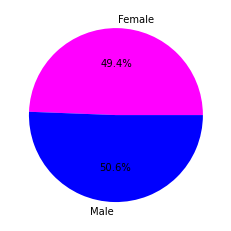

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mouse_study_df.loc[:,["Sex" , "Mouse ID"]]
sex_group = sex.groupby("Sex")
counts = sex_group.count()
colors = ["magenta","blue"]
plt.pie(counts.values, labels=counts.index.values ,colors = colors ,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Ramicane", :]
in_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [33]:
#Capomulin data
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [34]:
#Ramicane Data
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

tumors1 = ramlastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ramicane potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [35]:
#Infubinol Data
INlast = in_df.groupby('Mouse ID').max()['Timepoint']
INlastvol = pd.DataFrame(INlast)
INlastmerge = pd.merge(INlastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

tumors2 = INlastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Infubinol potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [36]:
#Ceftamin Data
celast = ceft_df.groupby('Mouse ID').max()['Timepoint']
celastvol = pd.DataFrame(celast)
celastmerge = pd.merge(celastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

tumors3 = celastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ceftamin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


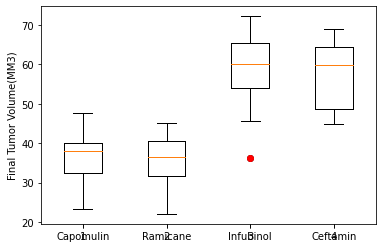

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors1 ,tumors2, tumors3]
fig1, ax = plt.subplots()
ax.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
ax.set_ylabel('Final Tumor Volume(MM3)')
ax.boxplot(data_to_plot, sym='r')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume(mm3)')

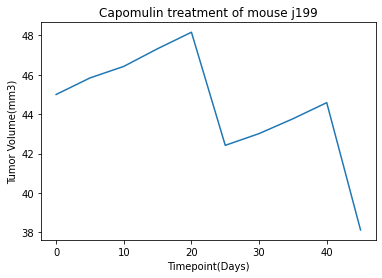

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
speical_mouse = cap_df.loc[cap_df['Mouse ID']=='j119']
sort_mouse = speical_mouse.sort_values(['Timepoint'],ascending=True)
plt.plot(sort_mouse['Timepoint'], sort_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse j199')
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume(mm3)")

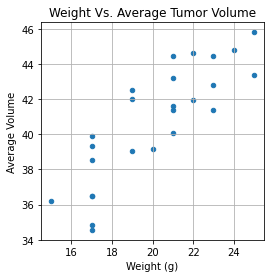

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
new_df = pd.DataFrame(cap_df.groupby(['Mouse ID', 'Weight (g)'])["Tumor Volume (mm3)"].mean()).reset_index()
new_df = new_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
new_df.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")

In [42]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#new_df = new_df.set_index('Mouse ID')
weight = new_df.iloc[:,1]
tumor = new_df.iloc[:,2]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


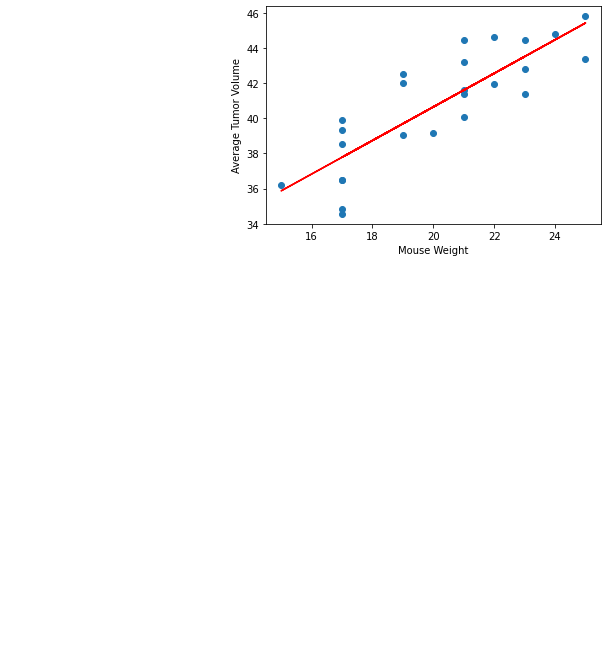

In [44]:
from scipy.stats import linregress
x_values = new_df['Weight (g)']
y_values = new_df['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()